# Visualization of State Spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (6, 2.5)
plt.rcParams["figure.dpi"] = 200

In [2]:
%matplotlib inline

In [3]:
aligned_last_file = 'bertnet_0.0.6.4_dev_epoch_-1_aligned.txt'
not_aligned_last_file = '../annotation/yaofu/output1.txt'

aligned_zero_file = 'bertnet_0.1.9.1_dev_epoch_-1_aligned.txt'
not_aligned_zero_file = '../annotation/yaofu/output2.txt'

In [4]:
def read_aligned(filepath):
    aligned_states = []
    lines = open(filepath).readlines()
    for l in lines:
        l = l.split()
        l_ = {}
        l_['state_id'] = int(l[1])
        if(int(l[3]) == 0): l_['type'] = 'static'
        if(int(l[3]) == 1): l_['type'] = 'dynamic'
        if(int(l[3]) == 2): l_['type'] = 'both'
        l_['occ'] = int(l[5])
        aligned_states.append(l_)
    return aligned_states

In [5]:
def read_not_aligned(filepath):
    not_aligned_states = []
    lines = open(filepath).readlines()
    for li, l in enumerate(lines):
        if(li % 3 == 0):
            l = l.split()
            l_ = {}
            l_['state_id'] = int(l[1])
            l_['occ'] = int(l[3])
            l_['type'] = l[-1].split('=')[-1]
            assert(l_['type'] in ['LEX', 'SYN', 'SEM', 'NA'])
            not_aligned_states.append(l_)
    return not_aligned_states

In [6]:
aligned_last = read_aligned(aligned_last_file)
aligned_zero = read_aligned(aligned_zero_file)

In [7]:
not_aligned_last = read_not_aligned(not_aligned_last_file)
not_aligned_zero = read_not_aligned(not_aligned_zero_file)

In [87]:
def plot_aligned(aligned):
    aligned_static_x = []
    aligned_static_y = []
    aligned_dynamic_x = []
    aligned_dynamic_y = []
    aligned_both_x = []
    aligned_both_y = []
    for li, l in enumerate(aligned):
        if(l['type'] == 'static'): 
            aligned_static_x.append(li)
            aligned_static_y.append(l['occ'])
        if(l['type'] == 'dynamic'):
            aligned_dynamic_x.append(li)
            aligned_dynamic_y.append(l['occ'])
        if(l['type'] == 'both'):
            aligned_both_x.append(li)
            aligned_both_y.append(l['occ'])
    aligned_static_y = np.log(np.array(aligned_static_y) + 1)
    aligned_dynamic_y = np.log(np.array(aligned_dynamic_y) + 1)
    aligned_both_y = np.log(np.array(aligned_both_y) + 1)
    
    plt.bar(x=aligned_static_x, height=aligned_static_y, color='tab:orange')
    plt.bar(x=aligned_dynamic_x, height=aligned_dynamic_y, color='tab:blue')
    plt.bar(x=aligned_both_x, height=aligned_both_y, color='tab:blue')
    return

In [93]:
def plot_not_aligned(not_aligned):
    not_aligned_lex_x = []
    not_aligned_lex_y = []
    not_aligned_syn_x = []
    not_aligned_syn_y = []
    not_aligned_sem_x = []
    not_aligned_sem_y = []
    not_aligned_na_x = []
    not_aligned_na_y = []
    for li, l in enumerate(not_aligned):
        if(l['type'] == 'LEX'): 
            not_aligned_lex_x.append(li)
            not_aligned_lex_y.append(l['occ'])
        if(l['type'] == 'SYN'):
            not_aligned_syn_x.append(li)
            not_aligned_syn_y.append(l['occ'])
        if(l['type'] == 'SEM'):
            not_aligned_sem_x.append(li)
            not_aligned_sem_y.append(l['occ'])
        if(l['type'] == 'NA'):
            not_aligned_na_x.append(li)
            not_aligned_na_y.append(l['occ'])
    not_aligned_lex_y = -np.log(np.array(not_aligned_lex_y) + 1)
    not_aligned_syn_y = -np.log(np.array(not_aligned_syn_y) + 1)
    not_aligned_sem_y = -np.log(np.array(not_aligned_sem_y) + 1)
    not_aligned_na_y = -np.log(np.array(not_aligned_na_y) + 1)
    
    plt.bar(x=not_aligned_lex_x, height=not_aligned_lex_y, color='tab:orange')
    plt.bar(x=not_aligned_syn_x, height=not_aligned_syn_y, color='tab:blue')
    plt.bar(x=not_aligned_sem_x, height=not_aligned_sem_y, color='tab:green')
    plt.bar(x=not_aligned_na_x, height=not_aligned_na_y, color='tab:gray')
    return

In [8]:
def plot_combined(aligned, not_aligned):
    combined = list(aligned)
    combined.extend(list(not_aligned))
    combined.sort(key=lambda x:x['occ'], reverse = True)
    
    aligned_static_x = []
    aligned_static_y = []
    aligned_dynamic_x = []
    aligned_dynamic_y = []
    aligned_both_x = []
    aligned_both_y = []
    
    not_aligned_lex_x = []
    not_aligned_lex_y = []
    not_aligned_syn_x = []
    not_aligned_syn_y = []
    not_aligned_sem_x = []
    not_aligned_sem_y = []
    not_aligned_na_x = []
    not_aligned_na_y = []
    
    for li, l in enumerate(combined):
        if(l['type'] == 'static'): 
            aligned_static_x.append(li)
            aligned_static_y.append(l['occ'])
        if(l['type'] == 'dynamic'):
            aligned_dynamic_x.append(li)
            aligned_dynamic_y.append(l['occ'])
        if(l['type'] == 'both'):
            aligned_both_x.append(li)
            aligned_both_y.append(l['occ'])
            
        if(l['type'] == 'LEX'): 
            not_aligned_lex_x.append(li)
            not_aligned_lex_y.append(l['occ'])
        if(l['type'] == 'SYN'):
            not_aligned_syn_x.append(li)
            not_aligned_syn_y.append(l['occ'])
        if(l['type'] == 'SEM'):
            not_aligned_sem_x.append(li)
            not_aligned_sem_y.append(l['occ'])
        if(l['type'] == 'NA'):
            not_aligned_na_x.append(li)
            not_aligned_na_y.append(l['occ'])

    aligned_static_y = np.log(np.array(aligned_static_y) + 1)
    aligned_dynamic_y = np.log(np.array(aligned_dynamic_y) + 1)
    aligned_both_y = np.log(np.array(aligned_both_y) + 1)
    
    not_aligned_lex_y = -np.log(np.array(not_aligned_lex_y) + 1)
    not_aligned_syn_y = -np.log(np.array(not_aligned_syn_y) + 1)
    not_aligned_sem_y = -np.log(np.array(not_aligned_sem_y) + 1)
    not_aligned_na_y = -np.log(np.array(not_aligned_na_y) + 1)
    
    plt.bar(x=aligned_static_x, height=aligned_static_y, color='tab:orange', label='static/lexical')
    plt.bar(x=aligned_dynamic_x, height=aligned_dynamic_y, color='tab:blue')
    plt.bar(x=aligned_both_x, height=aligned_both_y, color='tab:blue', label='contextualized/semantic')

    plt.bar(x=not_aligned_lex_x, height=not_aligned_lex_y, color='tab:orange')
    plt.bar(x=not_aligned_syn_x, height=not_aligned_syn_y, color='tab:green')
    plt.bar(x=not_aligned_sem_x, height=not_aligned_sem_y, color='tab:blue')
    plt.bar(x=not_aligned_na_x, height=not_aligned_na_y, color='tab:gray')
    
    plt.axhline(y=0, color='k')
    
#     plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='major',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
    
#     plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='major',      # both major and minor ticks are affected
#     left=True,
#     labelleft=True) # labels along the bottom edge are off
    
    plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    labelbottom=True,
    left=True,
    labelleft=False
    )
    
    plt.legend()
    return 

In [19]:
def plot_combined_v2(aligned, not_aligned, end_id=-1):
    combined = list(aligned)
    combined.extend(list(not_aligned))
    combined.sort(key=lambda x:x['occ'], reverse = True)
    
    aligned_static_x = []
    aligned_static_y = []
    aligned_dynamic_x = []
    aligned_dynamic_y = []
    aligned_both_x = []
    aligned_both_y = []
    
    not_aligned_lex_x = []
    not_aligned_lex_y = []
    not_aligned_syn_x = []
    not_aligned_syn_y = []
    not_aligned_sem_x = []
    not_aligned_sem_y = []
    not_aligned_na_x = []
    not_aligned_na_y = []
    
    for li, l in enumerate(combined):
        if(l['type'] == 'static'): 
            aligned_static_x.append(li)
            aligned_static_y.append(l['occ'])
        if(l['type'] == 'dynamic'):
            aligned_dynamic_x.append(li)
            aligned_dynamic_y.append(l['occ'])
        if(l['type'] == 'both'):
            aligned_both_x.append(li)
            aligned_both_y.append(l['occ'])
            
        if(l['type'] == 'LEX'): 
            not_aligned_lex_x.append(li)
            not_aligned_lex_y.append(l['occ'])
        if(l['type'] == 'SYN'):
            not_aligned_syn_x.append(li)
            not_aligned_syn_y.append(l['occ'])
        if(l['type'] == 'SEM'):
            not_aligned_sem_x.append(li)
            not_aligned_sem_y.append(l['occ'])
        if(l['type'] == 'NA'):
            not_aligned_na_x.append(li)
            not_aligned_na_y.append(l['occ'])

    aligned_static_y = np.log(np.array(aligned_static_y) + 1)
    aligned_dynamic_y = np.log(np.array(aligned_dynamic_y) + 1)
    aligned_both_y = np.log(np.array(aligned_both_y) + 1)
    
    not_aligned_lex_y = -np.log(np.array(not_aligned_lex_y) + 1)
    not_aligned_syn_y = -np.log(np.array(not_aligned_syn_y) + 1)
    not_aligned_sem_y = -np.log(np.array(not_aligned_sem_y) + 1)
    not_aligned_na_y = -np.log(np.array(not_aligned_na_y) + 1)
    
    fig = plt.figure()
    gs = fig.add_gridspec(2, hspace=0)
    axs = gs.subplots(sharex=True, sharey=False)
    
    axs[0].bar(x=aligned_static_x, height=aligned_static_y, color='tab:orange', label='POS/ENT')
    axs[0].bar(x=aligned_dynamic_x, height=aligned_dynamic_y, color='tab:blue')
    axs[0].bar(x=aligned_both_x, height=aligned_both_y, color='tab:blue', label='DEP/CCG/BCN')
    axs[0].legend(loc='upper right')

    axs[1].bar(x=not_aligned_lex_x, height=not_aligned_lex_y, color='tab:orange', label='LEX')
    axs[1].bar(x=not_aligned_syn_x, height=not_aligned_syn_y, color='tab:green', label='SYN')
    axs[1].bar(x=not_aligned_sem_x, height=not_aligned_sem_y, color='tab:blue', label='SEM')
    axs[1].bar(x=not_aligned_na_x, height=not_aligned_na_y, color='tab:gray')
    axs[1].legend(loc='lower right')
    
    axs[0].tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left=True,
    labelleft=False) # labels along the bottom edge are off
    axs[0].set_ylabel('Aligned')
    
    # axs[0].tick_params(
    # axis='x',          # changes apply to the x-axis
    # which='major',      # both major and minor ticks are affected
    # bottom=True,
    # labelbottom=False) # labels along the bottom edge are off
    
    axs[1].tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left=True,
    labelleft=False) # labels along the bottom edge are off
    axs[1].set_ylabel('Not Aligned')
    
    axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,
    labelbottom=True) # labels along the bottom edge are off
    
    # plt.setp(axs, ylabel='y axis label')
    return 

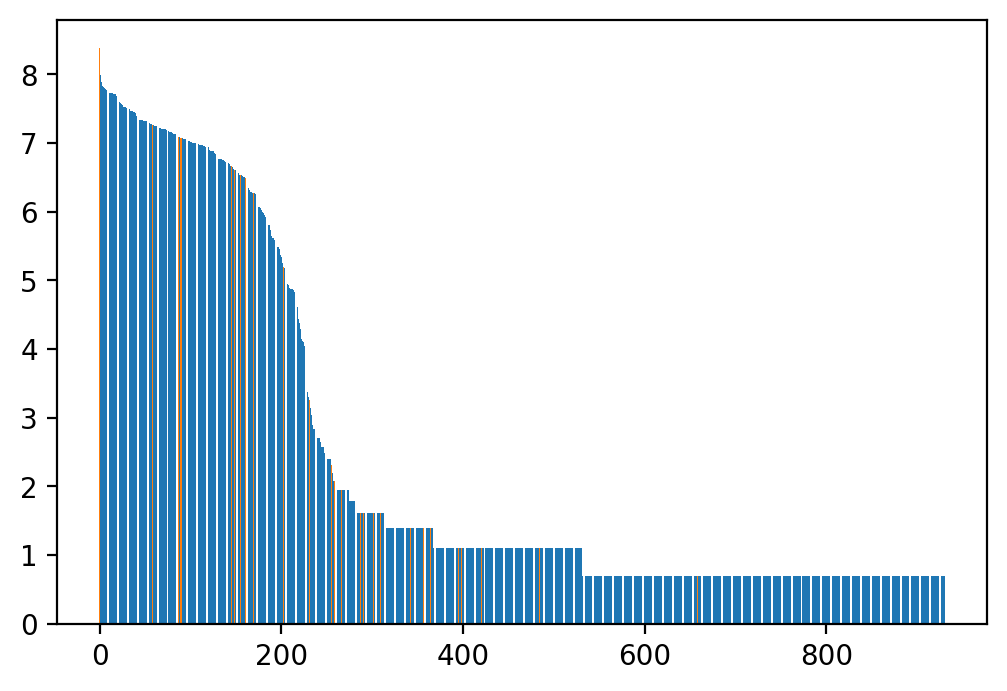

In [88]:
plot_aligned(aligned_last)

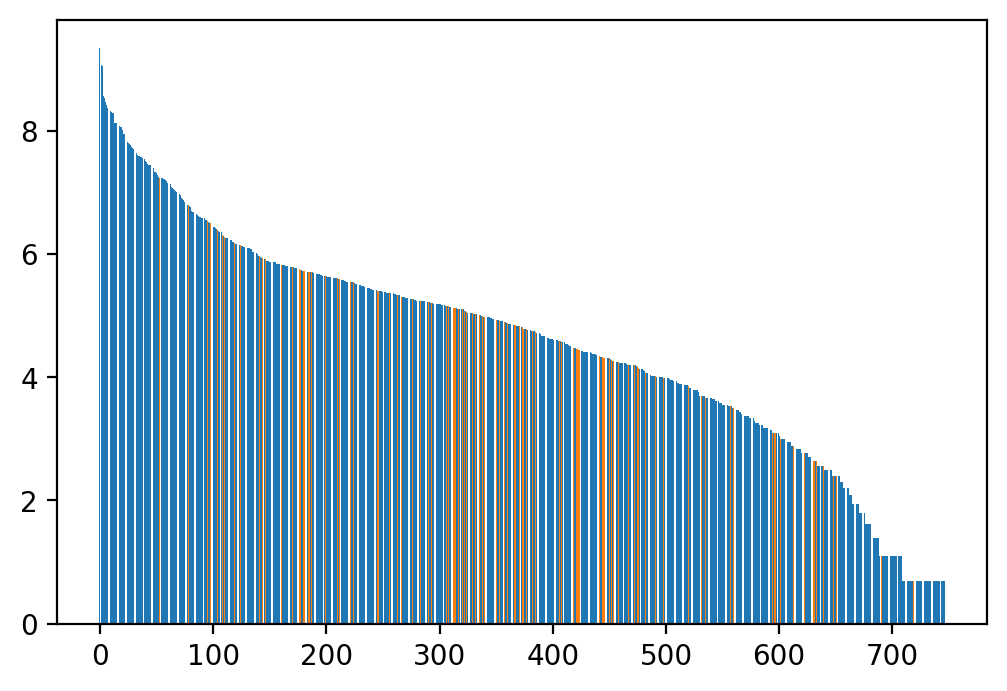

In [89]:
plot_aligned(aligned_zero)

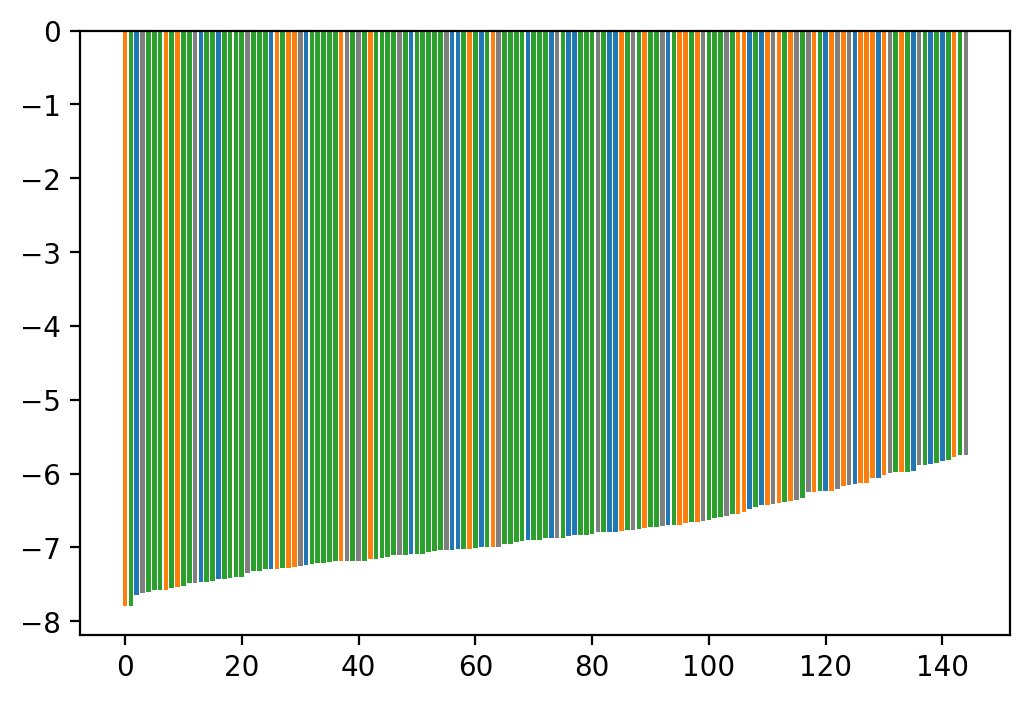

In [94]:
plot_not_aligned(not_aligned_last)

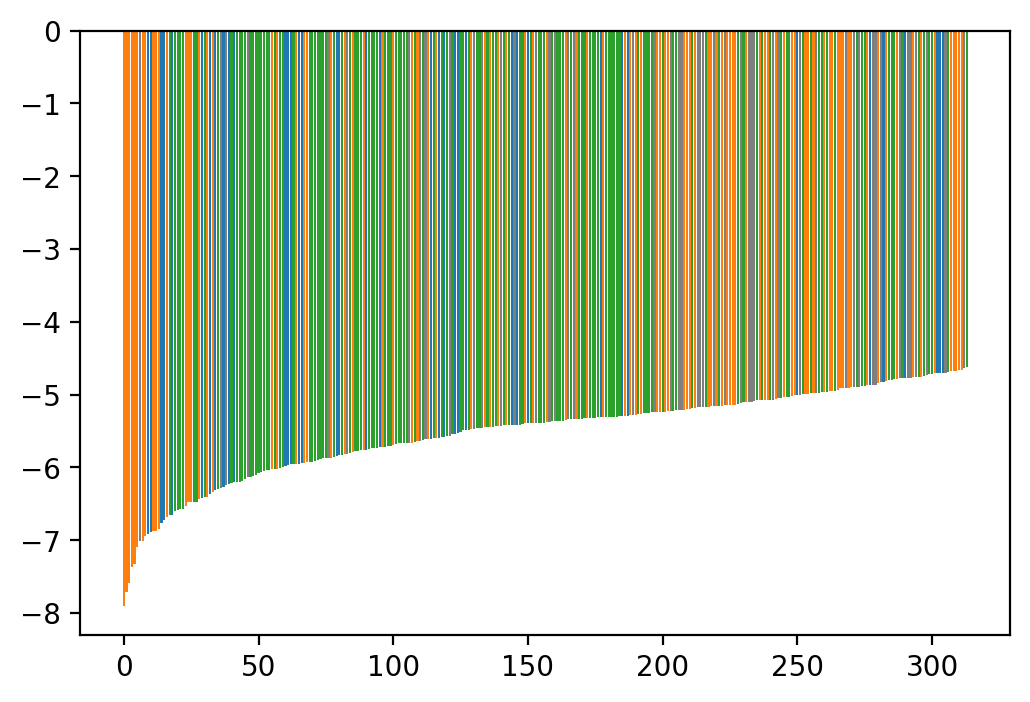

In [95]:
plot_not_aligned(not_aligned_zero)

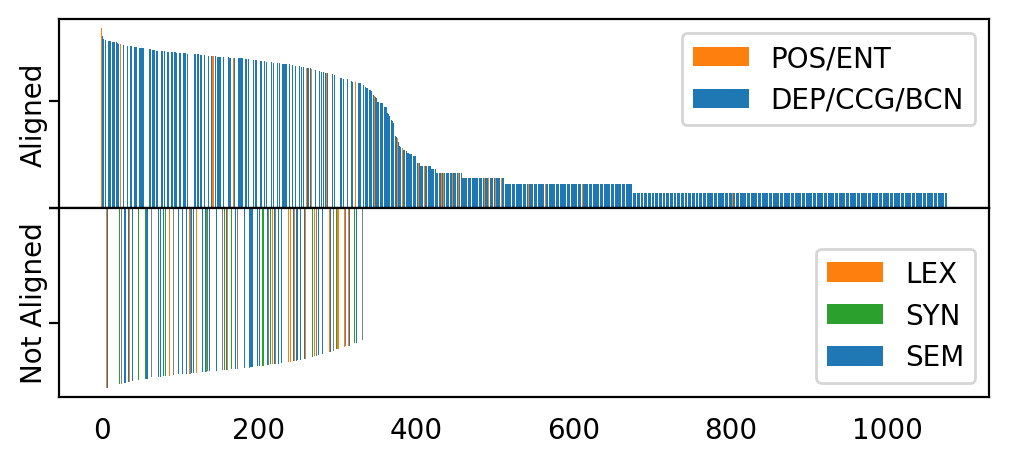

In [20]:
plot_combined_v2(aligned_last, not_aligned_last)

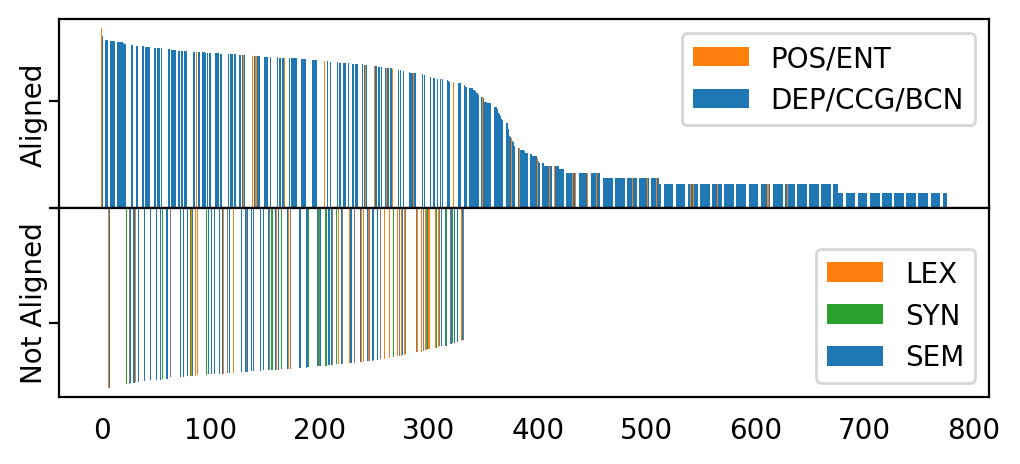

In [21]:
plot_combined_v2(aligned_last[:-300], not_aligned_last)

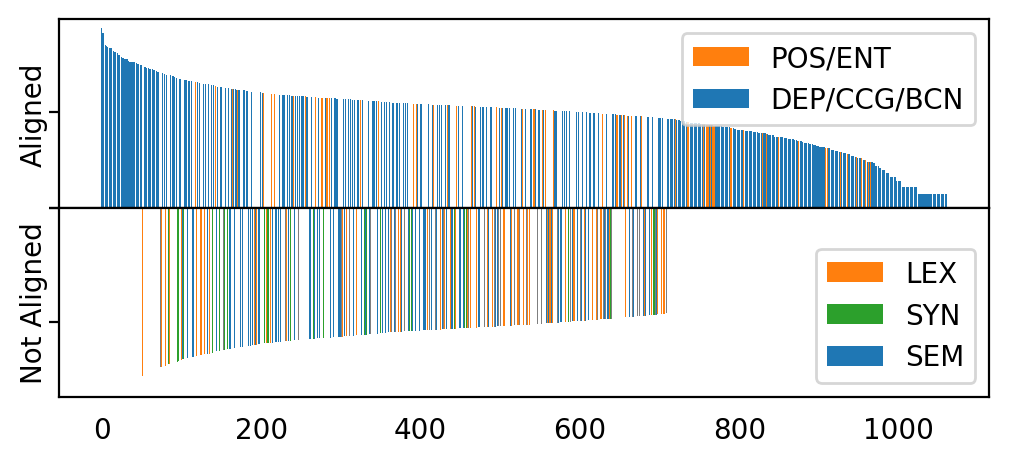

In [22]:
plot_combined_v2(aligned_zero, not_aligned_zero)